# Pandas, Pyplot, Seaborn Visualization

Analyzing data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [273]:
import numpy as np
import pandas as pd

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [275]:
df = pd.read_csv('911.csv')

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [277]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


** The top 5 zipcodes for 911 calls **

In [278]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** The top 5 townships (twp) for 911 calls **

In [279]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Amount of unique title codes  **

In [280]:
df['title'].nunique()

110

** Making a new column called 'Reason'. For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [281]:
title = df['title'].apply(lambda a:a.split(':')[0])

In [282]:
df['Reason'] = title

** Most common Reason for a 911 call  **

In [283]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

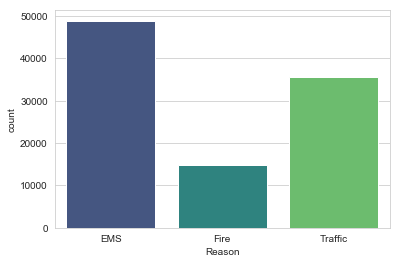

In [284]:
sns.countplot(x="Reason",data=df, palette='viridis')

In [285]:
type(df['timeStamp'][0])

str

** convert the column timeStamp from strings to DateTime objects. You can call special method .hour or .time by converting into DateTime object **

In [286]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [287]:
time = df['timeStamp'].iloc[0]
print(time.year, time.month, time.day)
print(time.hour, time.minute, time.second)

2015 12 10
17 40 0


** Creating new columns: Hour, Month, and Day **

In [304]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day']=df['timeStamp'].apply(lambda x: x.dayofweek)

In [305]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day']=df['Day'].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,Thu,2015-12-10
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,Thu,2015-12-10
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,Thu,2015-12-10
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,2015-12-10


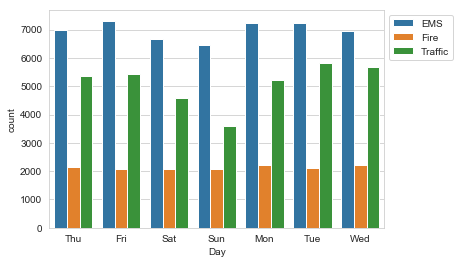

In [306]:
sns.countplot(x='Day',hue= 'Reason', data = df)
plt.legend(bbox_to_anchor=(1,1))

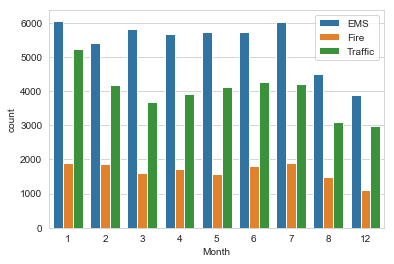

In [307]:
sns.countplot(x='Month', data = df, hue='Reason')
plt.legend(bbox_to_anchor=(1,1))



_____

** Some months are missing in the previous visualization.  I am going to use the count() method for aggregation **

In [308]:
# Preprocess: Fill in the missing data
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


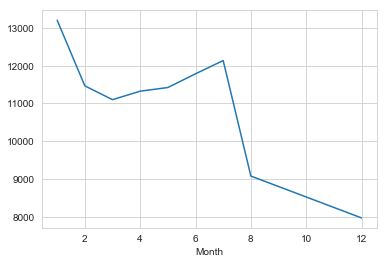

In [309]:
byMonth['title'].plot()

C:\Users\fathinah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


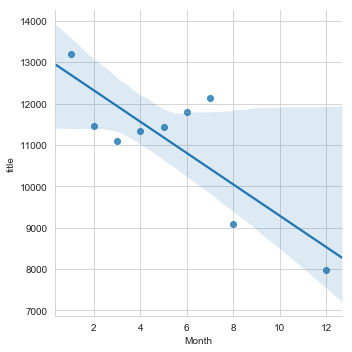

In [310]:
sns.lmplot(x='Month',y='title',data=byMonth.reset_index())

In [311]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

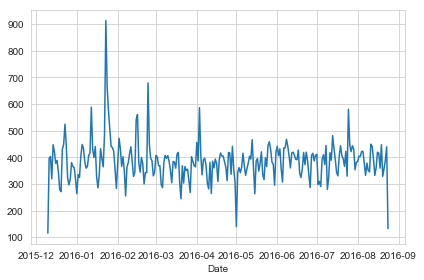

In [312]:
byDate=df.groupby('Date').count()['title'].plot()
plt.tight_layout()

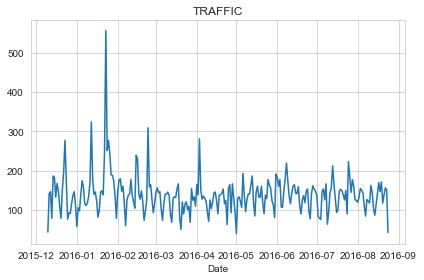

In [313]:
traf = df[df['Reason']=='Traffic'].groupby('Date').count()
plt.title('TRAFFIC')
traf['title'].plot()
plt.tight_layout()

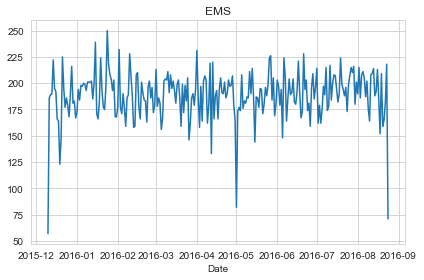

In [314]:
traf = df[df['Reason']=='EMS'].groupby('Date').count()
traf['title'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Creating  heatmaps with seaborn and our data. **

In [344]:
dayHour = df.groupby(by=['Day','Hour']).count()['title'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


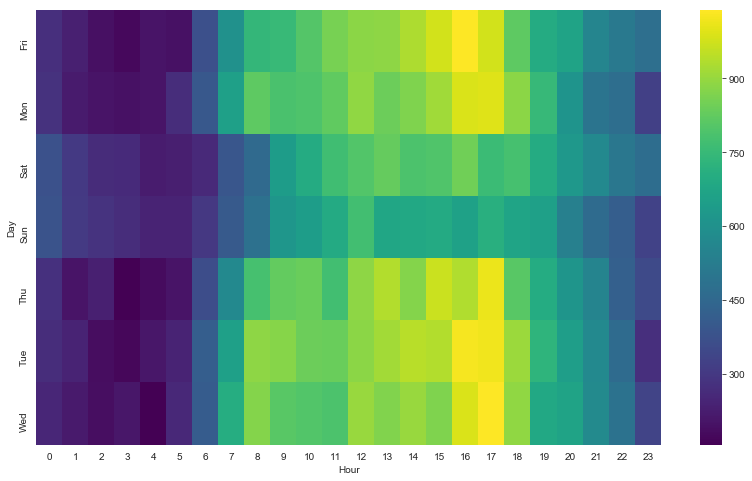

In [350]:
plt.figure(figsize=(14,8))
sns.heatmap(dayHour,cmap='viridis')

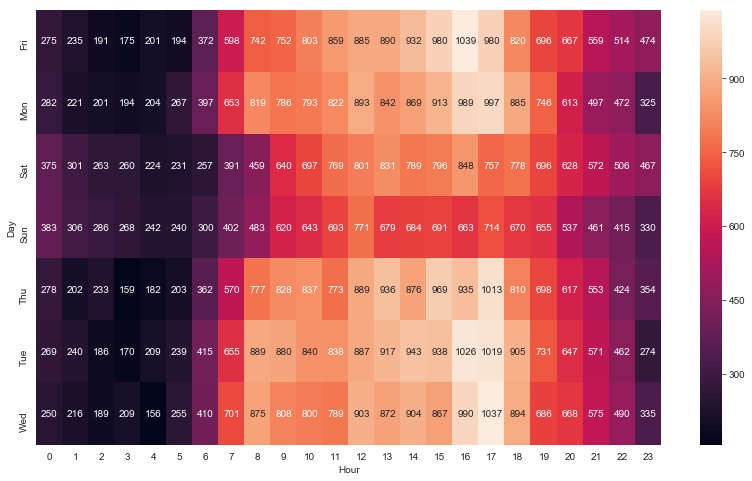

In [355]:
plt.figure(figsize=(14,8))
sns.heatmap(dayHour, annot=True, fmt='d')

**Creating clustermap to see the similarities between sample. The box which connects 2 row or column called dendogram representing similarities.**

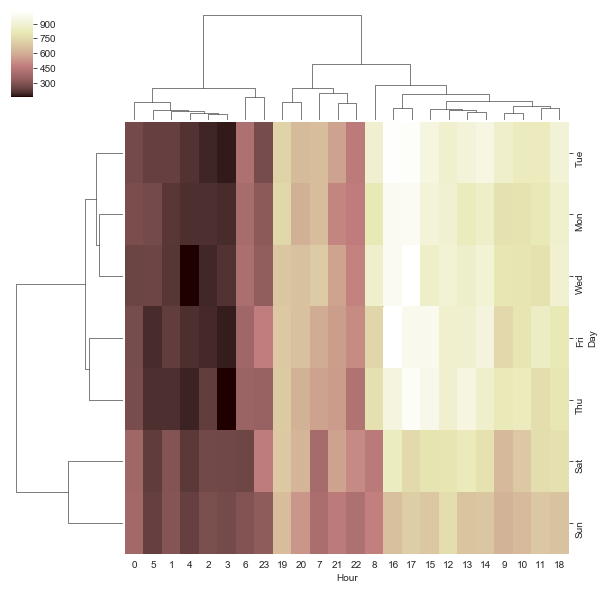

In [360]:
sns.clustermap(dayHour, cmap="pink")

In [369]:
monthDay=df.groupby(['Day','Month']).count()['title'].unstack()
monthDay

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


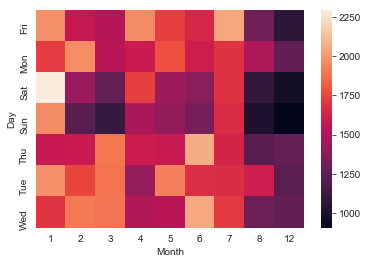

In [370]:
sns.heatmap(monthDay)

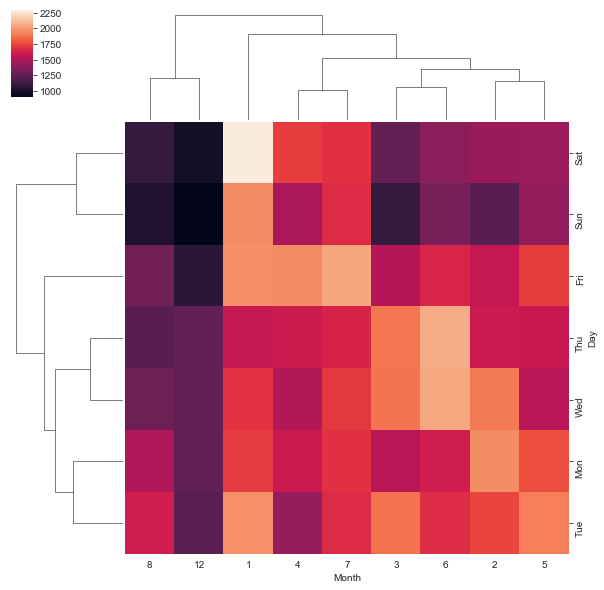

In [371]:
sns.clustermap(monthDay)